# **Following Google colab notebook continous as follows:**
 1. preprocessing
### 1.1. Dropping unwanted rows
### 1.2 Outliers CSE1203 Discrete Mathematics score
### 1.3 Outliers EEE2142 Electronic Devices and Circuits' score
### 1.4 Outliers CSE2200 Software Development I's score
### 1.5 Outliers MATH2203 Mathematics IV's score
### 1.6 Remove outliers using z score

2. Visualizations
### 2.1 Bar plot
### 2.2 Distribution of Scores
### 2.3 Scatter Plots of scores
### 2.4 Implot of scores
### 2.5 Distribution plot of scores
### 2.6 Distribution plot of all scores combine
### 2.7 Pairplot of gender
### 2.8 Pie Plot of Gender
### 2.9 Pie Plot of Groups
### 2.10 Correlation between variables

3. EDA
### 3.1 Descriptive statistics - Measures of central tendency(Mean, Median, Mode)
### 3.2 feature selection
### 3.3 Correlations
### 3.4 Heatmap

4. Model Building
### 4.1 Target----> CSE1203 Discrete Mathematics score
### 4.1.1 LinearRegression
### 4.1.2 RandomForestRegressor
### 4.1.3 DecisionTreeRegressor
### 4.1.4 LogisticRegression

5. Use Testset (In this section i use LinearRegression for four subject's score prediction)
### 5.1 Target----> CSE1203 Discrete Mathematics score
### 5.2 Target ---> EEE2142 Electronic Devices and Circuits' score
### 5.3 Target ---> CSE2200 Software Development I's score
### 5.4 Target ---> MATH2203 Mathematics IV's score
### 5.5 Concatenate 4 output together
### 5.6 Add "Mean score" column

6. Upload the predicted marks for the test data in CSV file




In [ ]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/ ML Engineer Hoobohoo/train.csv")
df_train.head()

,id,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents
0,0,female,A2,3,72,72,74,63,standard,BD
1,1,female,A3,5,69,90,88,80,standard,CD
2,2,female,A2,1,90,95,93,89,standard,master's degree
3,3,male,A1,4,47,57,44,42,free,associate's degree
4,4,male,A3,2,76,78,75,84,standard,CD


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              800 non-null    int64 
 1   gender                                          800 non-null    object
 2   group                                           800 non-null    object
 3   preparation rating                              800 non-null    int64 
 4   CSE1203 Discrete Mathematics score              800 non-null    int64 
 5   EEE2142 Electronic Devices and Circuits' score  800 non-null    int64 
 6   CSE2200 Software Development I's score          800 non-null    int64 
 7   MATH2203 Mathematics IV's score                 800 non-null    int64 
 8   Admission Fees                                  800 non-null    object
 9   Education Level of Parents                      800 no

# 1 preprocessing
### Dropping unwanted rows

In [ ]:
df_train = df_train.drop(['id'],axis = 1)

In [ ]:
df_train.head()

,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents
0,female,A2,3,72,72,74,63,standard,BD
1,female,A3,5,69,90,88,80,standard,CD
2,female,A2,1,90,95,93,89,standard,master's degree
3,male,A1,4,47,57,44,42,free,associate's degree
4,male,A3,2,76,78,75,84,standard,CD


### Outliers CSE1203 Discrete Mathematics score

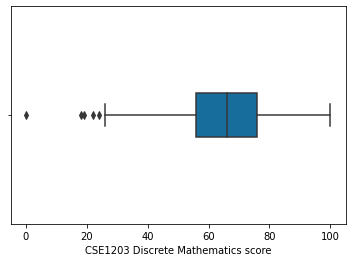

In [ ]:
import seaborn as sns
df_train_outliers = sns.boxplot( x="CSE1203 Discrete Mathematics score", 
                 data=df_train, 
                 width=0.2,
                 palette="colorblind")

### Outliers EEE2142 Electronic Devices and Circuits' score

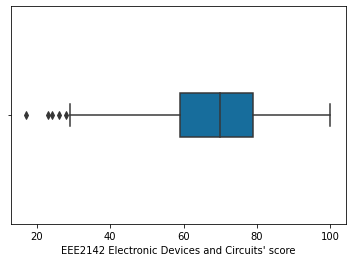

In [ ]:
df_train_outliers = sns.boxplot( x="EEE2142 Electronic Devices and Circuits' score", 
                 data=df_train, 
                 width=0.2,
                 palette="colorblind")

### Outliers CSE2200 Software Development I's score

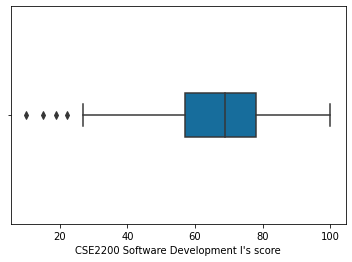

In [ ]:
df_train_outliers = sns.boxplot( x="CSE2200 Software Development I's score", 
                 data=df_train, 
                 width=0.2,
                 palette="colorblind")

### Outliers MATH2203 Mathematics IV's score

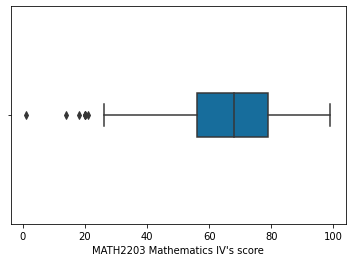

In [ ]:
df_train_outliers = sns.boxplot( x="MATH2203 Mathematics IV's score", 
                 data=df_train, 
                 width=0.2,
                 palette="colorblind")

### Remove outliers using z score

In [ ]:
import scipy.stats as stats
df_train_Z = np.abs(stats.zscore(df_train[["CSE1203 Discrete Mathematics score",
                                           "EEE2142 Electronic Devices and Circuits' score", 
                                           "CSE2200 Software Development I's score",
                                           "MATH2203 Mathematics IV's score"]]))

In [ ]:
df_train_Z

array([[0.39996804, 0.20096072, 0.40539186, 0.22919355],
       [0.20044127, 1.44348299, 1.33332745, 0.80020945],
       [1.59712865, 1.78862806, 1.66473302, 1.34518751],
       ...,
       [0.26695019, 1.0293089 , 0.86935965, 1.46629375],
       [0.20044127, 0.62738746, 0.92023041, 0.95583097],
       [0.93021042, 0.97253253, 0.72138707, 0.10808732]])

In [ ]:
print(np.where(df_train_Z > 4))

(array([59]), array([0]))


In [ ]:
df_train.iloc[[59]]

,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents
59,female,A3,4,0,17,10,1,free,ED


### I can't remove this outliers because the student may fail, I have to work with real data

# 2 Visualizations

For categorical feature values, I use plots for seeing distribution of each unique values.

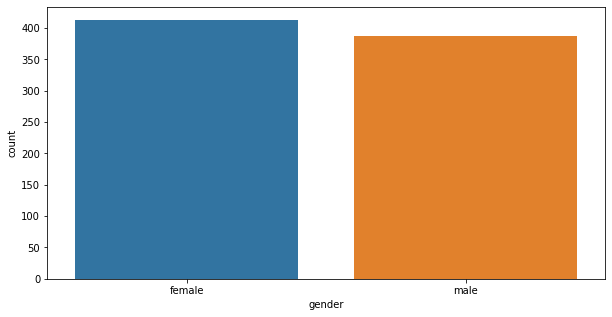

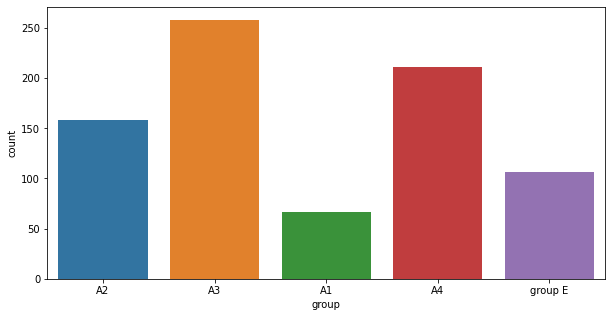

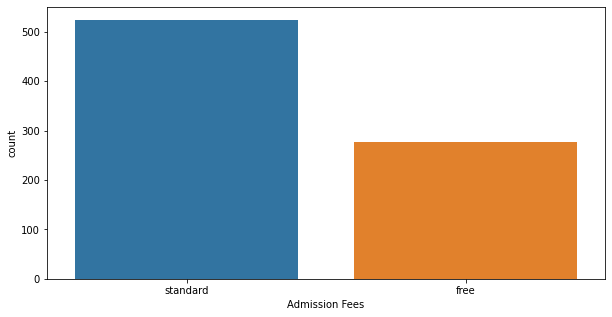

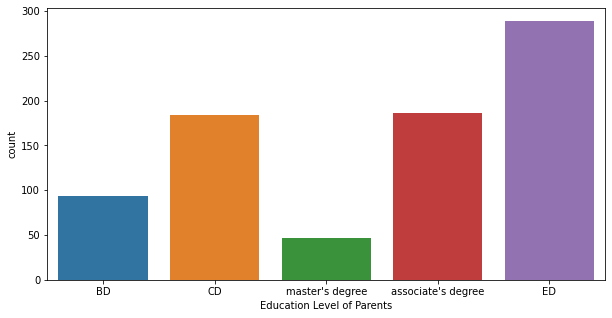

In [ ]:
categorical_feature_cols = [col for col in df_train.columns if df_train[col].dtype == 'object']
for col in categorical_feature_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=df_train)
    plt.show()

Distribution of Scores

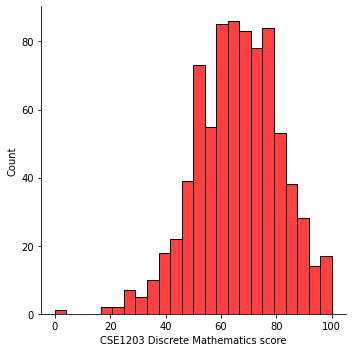

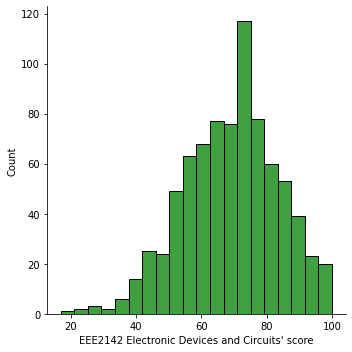

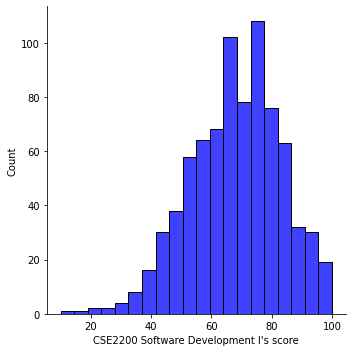

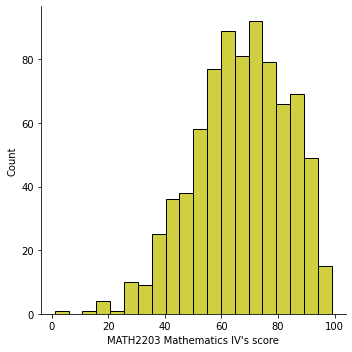

In [ ]:
sns.displot(df_train["CSE1203 Discrete Mathematics score"], color='r');
sns.displot(df_train["EEE2142 Electronic Devices and Circuits' score"], color='g');
sns.displot(df_train["CSE2200 Software Development I's score"], color='b');
sns.displot(df_train["MATH2203 Mathematics IV's score"], color='y');

Scatter Plots of scores

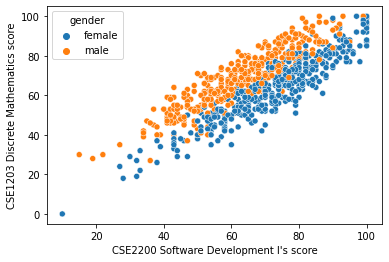

In [ ]:
sns.scatterplot(y=df_train["CSE1203 Discrete Mathematics score"], x=df_train["CSE2200 Software Development I's score"], hue=df_train['gender']);

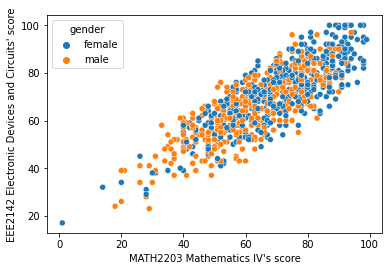

In [ ]:
sns.scatterplot(y=df_train["EEE2142 Electronic Devices and Circuits' score"], x=df_train["MATH2203 Mathematics IV's score"], hue=df_train['gender']);

Implot of scores

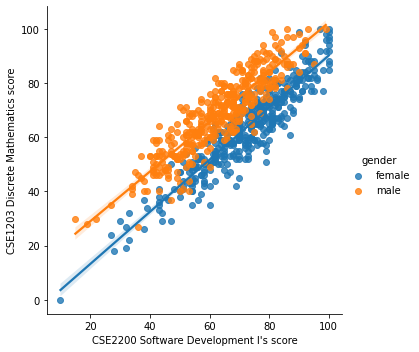

In [ ]:
sns.lmplot(data=df_train, y="CSE1203 Discrete Mathematics score", x="CSE2200 Software Development I's score", hue='gender');

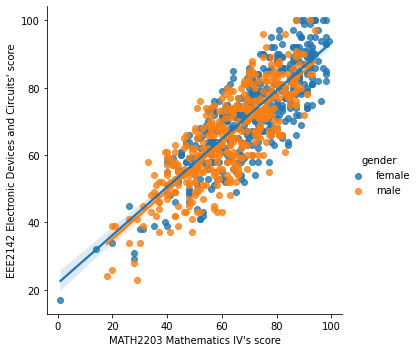

In [ ]:
sns.lmplot(data=df_train, y="EEE2142 Electronic Devices and Circuits' score", x="MATH2203 Mathematics IV's score", hue='gender');

Distribution plot of scores

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

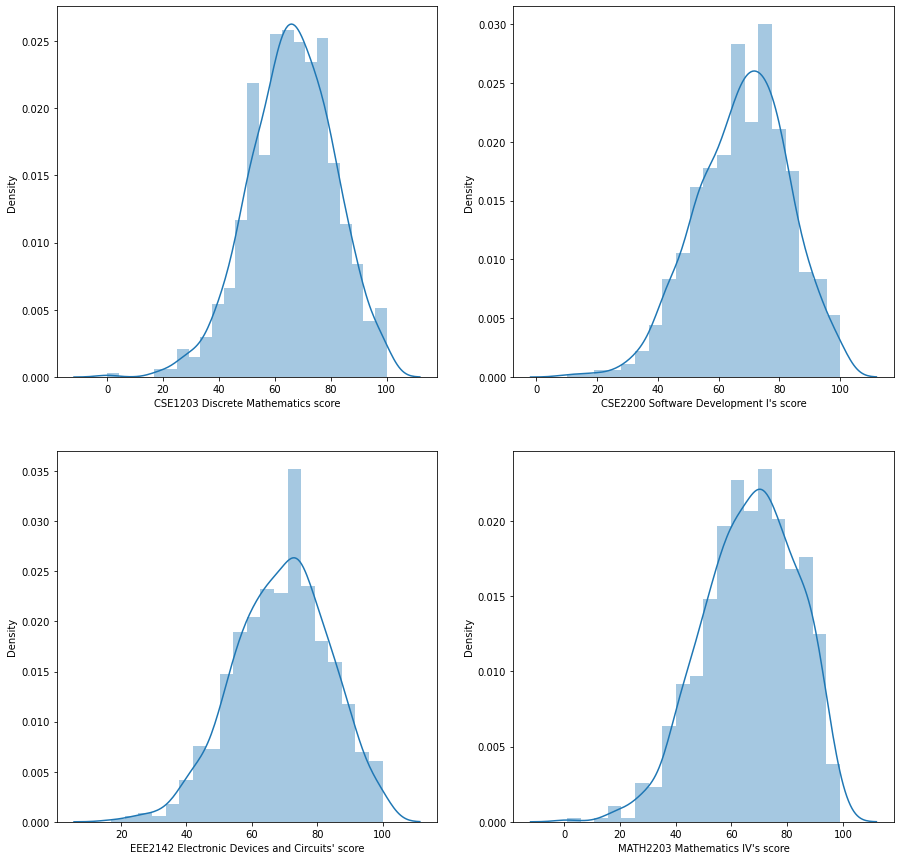

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(a=df_train["CSE1203 Discrete Mathematics score"], kde=True);
plt.subplot(2,2,2)
sns.distplot(a=df_train["CSE2200 Software Development I's score"], kde=True);
plt.subplot(2,2,3)
sns.distplot(a=df_train["EEE2142 Electronic Devices and Circuits' score"], kde=True);
plt.subplot(2,2,4)
sns.distplot(a=df_train["MATH2203 Mathematics IV's score"], kde=True);

Distribution plot of all scores combine

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

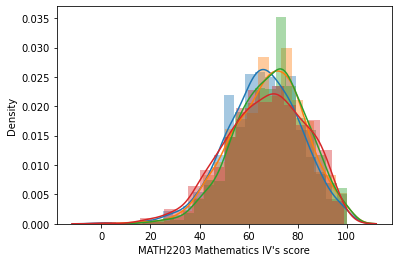

In [ ]:
sns.distplot(a=df_train["CSE1203 Discrete Mathematics score"], kde=True);
sns.distplot(a=df_train["CSE2200 Software Development I's score"], kde=True);
sns.distplot(a=df_train["EEE2142 Electronic Devices and Circuits' score"], kde=True);
sns.distplot(a=df_train["MATH2203 Mathematics IV's score"], kde=True);

Pairplot of gender

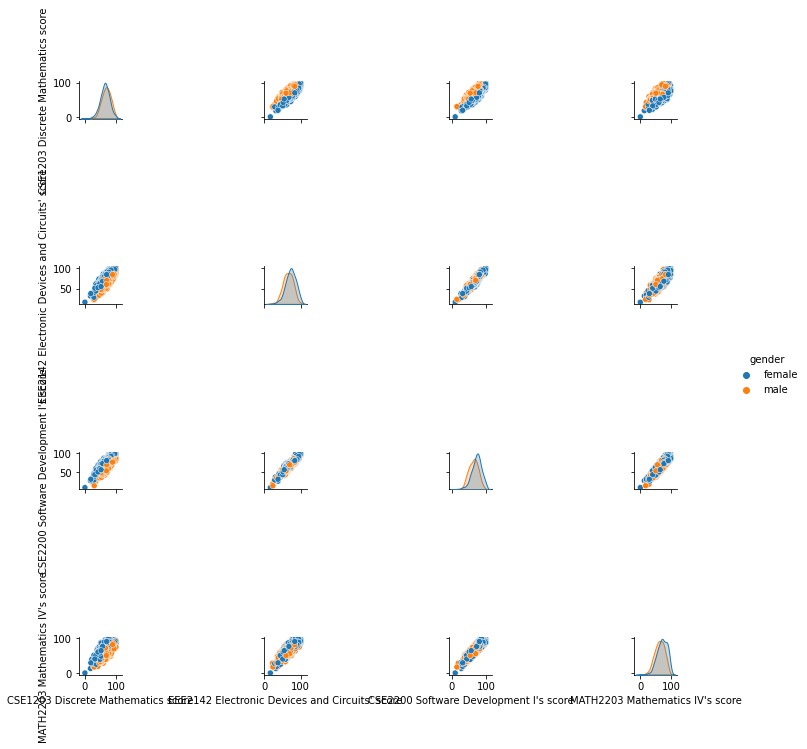

In [ ]:
sns.pairplot(df_train,vars=["CSE1203 Discrete Mathematics score",
                            "EEE2142 Electronic Devices and Circuits' score",
                            "CSE2200 Software Development I's score",
                            "MATH2203 Mathematics IV's score"],hue='gender');

Pie Plot of Gender 

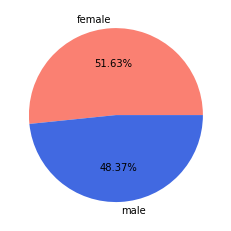

In [ ]:
plt.pie(df_train['gender'].value_counts(),labels=['female','male'],colors=['salmon','royalblue'],autopct='%.2f%%');

Pie Plot of Groups

In [ ]:
df_train.iloc[:,1].value_counts()

A3         258
A4         211
A2         158
group E    106
A1          67
Name: group, dtype: int64

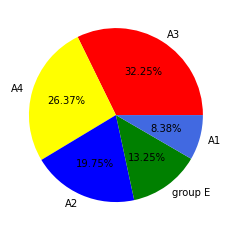

In [ ]:
plt.pie(df_train.iloc[:,1].value_counts(),labels=['A3','A4','A2','group E','A1'],colors=['Red','yellow','blue','green','royalblue'],autopct='%.2f%%');

Correlation between variables

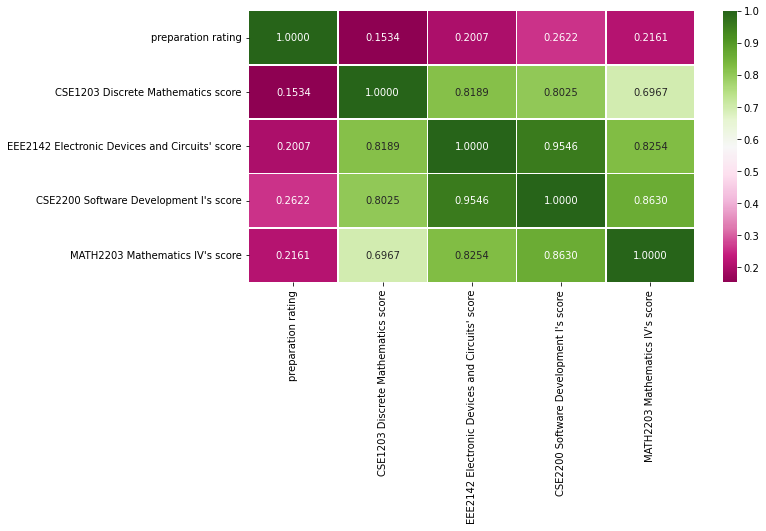

In [ ]:
corr_matrix = df_train.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".4f", 
            cmap="PiYG");

# 3 EDA

In [ ]:
for i in range(len(df_train.columns)-1):
    print("Total Number Of Unique Values In",df_train.columns[i],"Are:",df_train[df_train.columns[i]].nunique())

Total Number Of Unique Values In gender Are: 2
Total Number Of Unique Values In group Are: 5
Total Number Of Unique Values In preparation rating Are: 6
Total Number Of Unique Values In CSE1203 Discrete Mathematics score Are: 79
Total Number Of Unique Values In EEE2142 Electronic Devices and Circuits' score Are: 72
Total Number Of Unique Values In CSE2200 Software Development I's score Are: 76
Total Number Of Unique Values In MATH2203 Mathematics IV's score Are: 77
Total Number Of Unique Values In Admission Fees Are: 2


In [ ]:
df_train.duplicated().sum()

0

Descriptive statistics - Measures of central tendency(Mean, Median, Mode)

In [ ]:
CentralTendacy = {}
CentralTendacy['Mean of CSE1203 Discrete Mathematics score'] = df_train['CSE1203 Discrete Mathematics score'].mean()
CentralTendacy['Median of CSE1203 Discrete Mathematics score'] = df_train['CSE1203 Discrete Mathematics score'].median()
CentralTendacy['Mode of CSE1203 Discrete Mathematics score'] = df_train['CSE1203 Discrete Mathematics score'].mode()[0]

CentralTendacy

{'Mean of CSE1203 Discrete Mathematics score': 65.98625,
 'Median of CSE1203 Discrete Mathematics score': 66.0,
 'Mode of CSE1203 Discrete Mathematics score': 65}

In [ ]:
CentralTendacy = {}
CentralTendacy["Mean of EEE2142 Electronic Devices and Circuits' score"] = df_train["EEE2142 Electronic Devices and Circuits' score"].mean()
CentralTendacy["Median of EEE2142 Electronic Devices and Circuits' score"] = df_train["EEE2142 Electronic Devices and Circuits' score"].median()
CentralTendacy["Mode of EEE2142 Electronic Devices and Circuits' score"] = df_train["EEE2142 Electronic Devices and Circuits' score"].mode()[0]

CentralTendacy

{"Mean of EEE2142 Electronic Devices and Circuits' score": 69.08875,
 "Median of EEE2142 Electronic Devices and Circuits' score": 70.0,
 "Mode of EEE2142 Electronic Devices and Circuits' score": 74}

In [ ]:
CentralTendacy = {}
CentralTendacy["Mean of CSE2200 Software Development I's score"] = df_train["CSE2200 Software Development I's score"].mean()
CentralTendacy["Median of CSE2200 Software Development I's score"] = df_train["CSE2200 Software Development I's score"].median()
CentralTendacy["Mode of CSE2200 Software Development I's score"] = df_train["CSE2200 Software Development I's score"].mode()[0]

CentralTendacy

{"Mean of CSE2200 Software Development I's score": 67.88375,
 "Median of CSE2200 Software Development I's score": 69.0,
 "Mode of CSE2200 Software Development I's score": 70}

In [ ]:
CentralTendacy = {}
CentralTendacy["Mean of MATH2203 Mathematics IV's score"] = df_train["MATH2203 Mathematics IV's score"].mean()
CentralTendacy["Median of MATH2203 Mathematics IV's score"] = df_train["MATH2203 Mathematics IV's score"].median()
CentralTendacy["Mode of MATH2203 Mathematics IV's score"] = df_train["MATH2203 Mathematics IV's score"].mode()[0]

CentralTendacy

{"Mean of MATH2203 Mathematics IV's score": 66.785,
 "Median of MATH2203 Mathematics IV's score": 68.0,
 "Mode of MATH2203 Mathematics IV's score": 69}

In [ ]:
df_train.describe()

,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,3.083750,65.986250,69.088750,67.883750,66.785000
std,1.818205,15.044983,14.495725,15.096692,16.524757
min,0.000000,0.000000,17.000000,10.000000,1.000000
25%,1.750000,56.000000,59.000000,57.000000,56.000000
50%,3.000000,66.000000,70.000000,69.000000,68.000000
75%,5.000000,76.000000,79.000000,78.000000,79.000000
max,5.000000,100.000000,100.000000,100.000000,99.000000


Correlations

In [ ]:
#Read data again for correlation
df_marks = pd.read_csv("/content/drive/MyDrive/ ML Engineer Hoobohoo/train.csv")
df_marks.columns

Index(['id', 'gender', 'group', 'preparation rating',
       'CSE1203 Discrete Mathematics score',
       'EEE2142 Electronic Devices and Circuits' score',
       'CSE2200 Software Development I's score',
       'MATH2203 Mathematics IV's score', 'Admission Fees',
       'Education Level of Parents'],
      dtype='object')

In [ ]:
#create dummy variables
gender_dummy = pd.get_dummies(df_marks['gender'],drop_first = True)
group_dummy = pd.get_dummies(df_marks['group'],drop_first = True)
parental_dummy = pd.get_dummies(df_marks['Education Level of Parents'],drop_first = True)
admission_dummy = pd.get_dummies(df_marks['Admission Fees'],drop_first = True)

In [ ]:
#concate along column wise 
df_marks = pd.concat([df_marks,gender_dummy,group_dummy,parental_dummy,admission_dummy],axis = 1)

In [ ]:
df_marks.head(10)

,id,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
0,0,female,A2,3,72,72,74,63,standard,BD,0,1,0,0,0,0,0,0,0,1
1,1,female,A3,5,69,90,88,80,standard,CD,0,0,1,0,0,1,0,0,0,1
2,2,female,A2,1,90,95,93,89,standard,master's degree,0,1,0,0,0,0,0,0,1,1
3,3,male,A1,4,47,57,44,42,free,associate's degree,1,0,0,0,0,0,0,1,0,0
4,4,male,A3,2,76,78,75,84,standard,CD,1,0,1,0,0,1,0,0,0,1
5,5,female,A2,4,71,83,78,69,standard,associate's degree,0,1,0,0,0,0,0,1,0,1
6,6,female,A2,5,88,95,92,81,standard,CD,0,1,0,0,0,1,0,0,0,1
7,7,male,A2,1,40,43,39,46,free,CD,1,1,0,0,0,1,0,0,0,0
8,8,male,A4,5,64,64,67,76,free,ED,1,0,0,1,0,0,1,0,0,0
9,9,female,A2,0,38,60,50,45,free,ED,0,1,0,0,0,0,1,0,0,0


In [ ]:
df_marks = df_marks.drop(['id','gender','group','Education Level of Parents','Admission Fees'], axis=1)
df_marks.head()

,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
0,3,72,72,74,63,0,1,0,0,0,0,0,0,0,1
1,5,69,90,88,80,0,0,1,0,0,1,0,0,0,1
2,1,90,95,93,89,0,1,0,0,0,0,0,0,1,1
3,4,47,57,44,42,1,0,0,0,0,0,0,1,0,0
4,2,76,78,75,84,1,0,1,0,0,1,0,0,0,1


In [ ]:
df_marks_corr = df_marks.corr()
df_marks_corr

,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
preparation rating,1.000000,0.153360,0.200728,0.262214,0.216085,-0.017085,-0.009042,-0.006781,-0.016659,0.024597,-0.043172,-0.021773,0.031630,0.014813,0.020426
CSE1203 Discrete Mathematics score,0.153360,1.000000,0.818916,0.802499,0.696660,0.158096,-0.084956,-0.081717,0.056014,0.200943,0.014526,-0.154902,0.066237,0.031340,0.337919
EEE2142 Electronic Devices and Circuits' score,0.200728,0.818916,1.000000,0.954613,0.825364,-0.251631,-0.054623,-0.011426,0.029817,0.105771,-0.015856,-0.160703,0.069142,0.083598,0.217363
CSE2200 Software Development I's score,0.262214,0.802499,0.954613,1.000000,0.863024,-0.312517,-0.066727,-0.010459,0.070981,0.088298,-0.004648,-0.206179,0.077006,0.100576,0.237018
MATH2203 Mathematics IV's score,0.216085,0.696660,0.825364,0.863024,1.000000,-0.253821,-0.075105,0.012383,0.057604,0.068270,0.004597,-0.176931,0.057337,0.069559,0.222227
male,-0.017085,0.158096,-0.251631,-0.312517,-0.253821,1.000000,-0.052981,-0.073886,0.039329,0.027464,0.005884,0.027058,-0.005788,-0.050379,0.007972
A2,-0.009042,-0.084956,-0.054623,-0.066727,-0.075105,-0.052981,1.000000,-0.342272,-0.296924,-0.193881,-0.039842,0.071393,-0.005463,-0.043828,-0.003236
A3,-0.006781,-0.081717,-0.011426,-0.010459,0.012383,-0.073886,-0.342272,1.000000,-0.412947,-0.269639,0.004194,-0.034529,0.031748,-0.013163,-0.033697
A4,-0.016659,0.056014,0.029817,0.070981,0.057604,0.039329,-0.296924,-0.412947,1.000000,-0.233914,0.009909,-0.001321,-0.027246,0.091722,0.022646
group E,0.024597,0.200943,0.105771,0.088298,0.068270,0.027464,-0.193881,-0.269639,-0.233914,1.000000,0.057998,-0.078998,0.020555,-0.019246,0.058713


In [ ]:
df_marks.dtypes

preparation rating                                int64
CSE1203 Discrete Mathematics score                int64
EEE2142 Electronic Devices and Circuits' score    int64
CSE2200 Software Development I's score            int64
MATH2203 Mathematics IV's score                   int64
male                                              uint8
A2                                                uint8
A3                                                uint8
A4                                                uint8
group E                                           uint8
CD                                                uint8
ED                                                uint8
associate's degree                                uint8
master's degree                                   uint8
standard                                          uint8
dtype: object

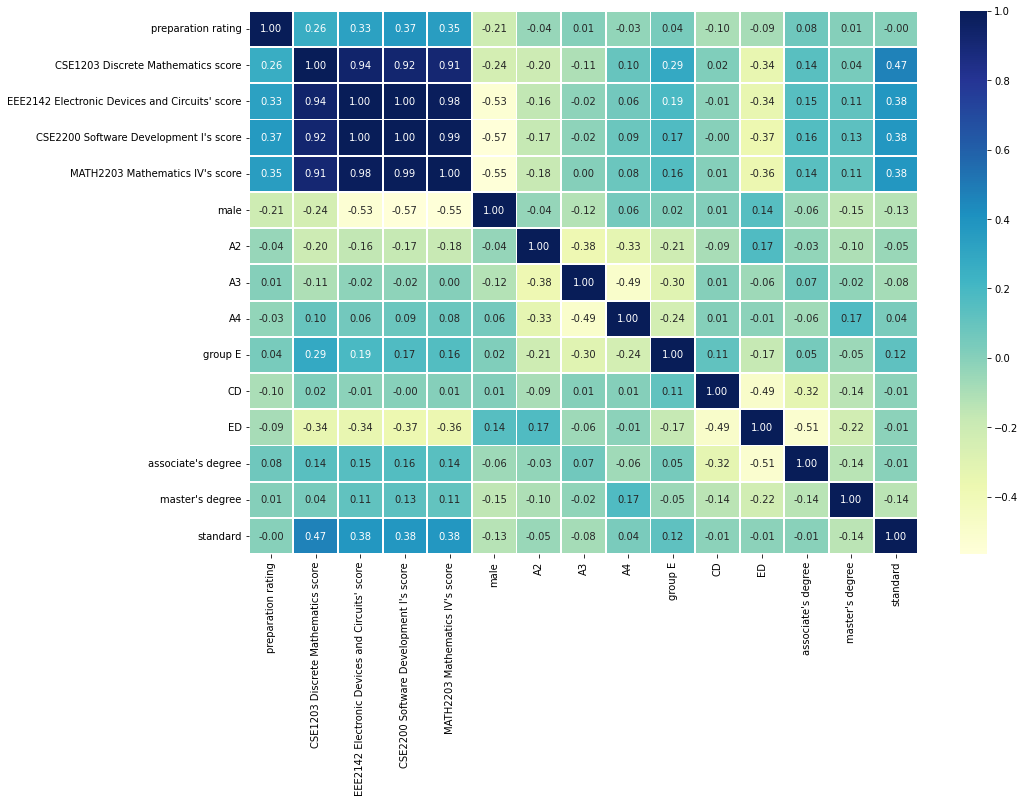

In [ ]:
# Correlation of variables described
corr_matrix = df_marks_corr.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.8, 
            fmt= ".2f", 
            cmap="YlGnBu");

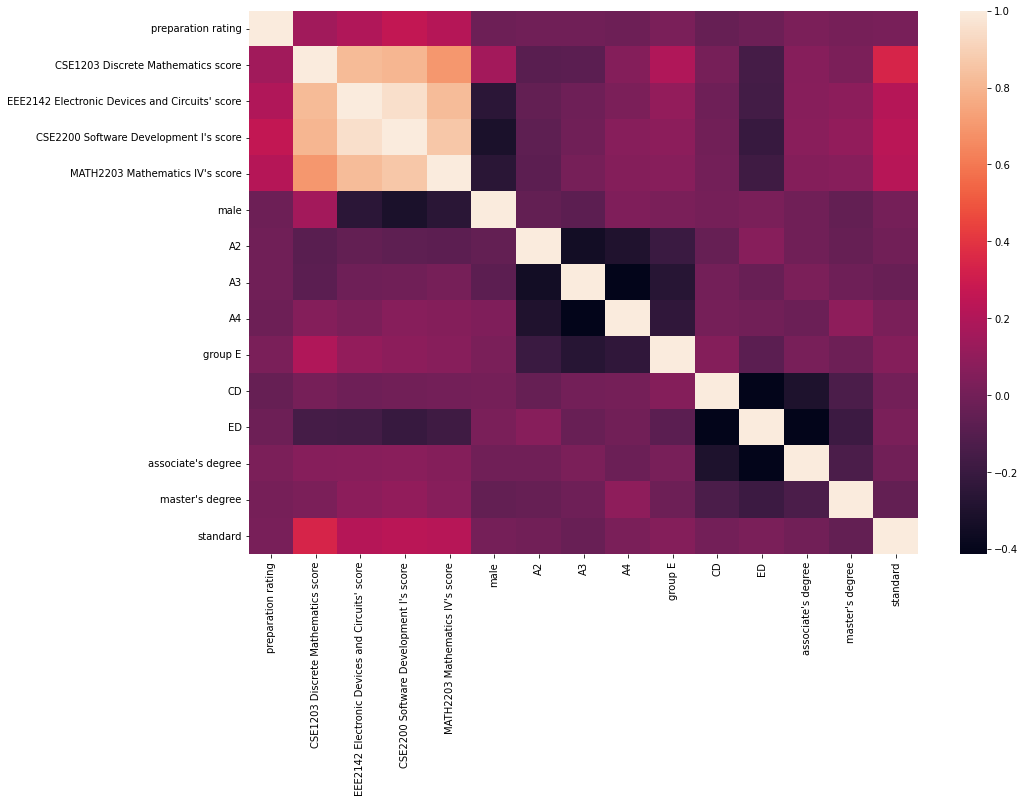

In [ ]:
# Correlation of variables described using heatmap
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df_marks_corr,ax=ax)

# 4 Model Building

## Target----> CSE1203 Discrete Mathematics score 
### LinearRegression 

In [ ]:
## split data 
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_marks,test_size=0.2,random_state=5)
x_train=train.drop('CSE1203 Discrete Mathematics score',axis=1)
y_train=train['CSE1203 Discrete Mathematics score']
x_test=test.drop('CSE1203 Discrete Mathematics score',axis=1)
y_test=test['CSE1203 Discrete Mathematics score']

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

In [ ]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8723975534453203
intercept: -7.664084197529135
slope: [-6.73020654e-01  3.24397853e-01  6.37787650e-01 -1.30270157e-02
  1.28432065e+01  6.52147073e-01 -1.03106077e-02  2.20649984e-01
  4.71046367e+00  1.63303772e+00  1.83278953e+00  1.58265158e+00
 -4.74273799e-01  3.63710249e+00]


In [ ]:
y_pred = regressor.predict(x_test)
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   4.429997319701193
MSE :   30.711704128925806
RMAE :   5.541814155033152


In [ ]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.8723975534453203
0.8561149394240165


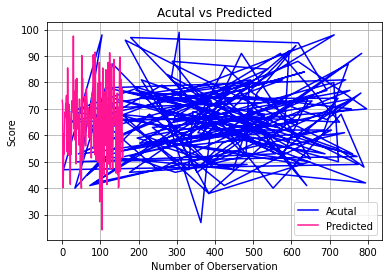

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('Score')
plt.legend()
plt.show()

### RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state=1)
model = forest_model.fit(x_train, y_train)

In [ ]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9766860124986978


In [ ]:
y_pred = forest_model.predict(x_test)
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   4.664372916666666
MSE :   34.00539920902778
RMAE :   5.831414854821064


In [ ]:
accuracy_train = forest_model.score(x_train, y_train)
accuracy_test = forest_model.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9766860124986978
0.8406839000349343


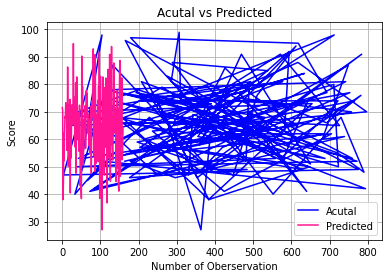

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('Score')
plt.legend()
plt.show()

### DecisionTreeRegressor 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Dt = DecisionTreeRegressor(random_state=1)
model = Dt.fit(x_train, y_train)

In [ ]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9999863614587012


In [ ]:
y_pred = Dt.predict(x_test)
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   6.90625
MSE :   72.95625
RMAE :   8.541443086504762


In [ ]:
accuracy_train = Dt.score(x_train, y_train)
accuracy_test = Dt.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9999863614587012
0.6581982423840914


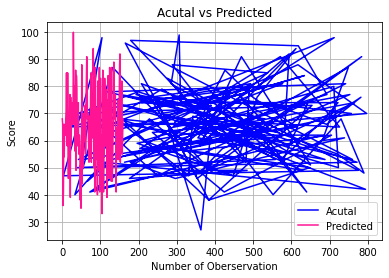

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('Score')
plt.legend()
plt.show()

### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(random_state=10)
model = Logistic.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.0703125
intercept: [ 0.0332687   0.02167931  0.01718658  0.01513186  0.01820887  0.01830949
  0.01804972  0.02457195  0.04896866  0.05343011  0.02655694  0.01007
  0.01035767  0.04733765  0.00680405  0.03886866  0.00388635  0.01823512
  0.05692303  0.01589877  0.00923004  0.03212251  0.04969911  0.03271125
  0.07174129  0.04886122  0.04933835  0.05819087  0.06406986  0.04466045
  0.06699074  0.12596391  0.08582066  0.07175728  0.01192602  0.02794924
  0.09160215  0.09002517  0.02604413  0.08194508  0.07902515  0.01135914
  0.00407333 -0.00543873  0.01864511 -0.05582105  0.02556112 -0.00204273
 -0.01345527 -0.00901111 -0.02248476 -0.04452678 -0.05549104 -0.06222159
 -0.04632155 -0.08181183 -0.04171195 -0.08378525 -0.07041541 -0.08028615
 -0.10280508 -0.06474764 -0.07003724 -0.08801399 -0.03828278 -0.11389462
 -0.10976707 -0.0479266  -0.05906506 -0.03403218 -0.05991759 -0.02887644
 -0.05963393 -0.01868561 -0.03787615 -0.04081058 -0.04054213 -0.09331677]
sl

In [ ]:
y_pred = Logistic.predict(x_test)
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   12.60625
MSE :   241.25625
RMAE :   15.532425760324754


In [ ]:
accuracy_train = Logistic.score(x_train, y_train)
accuracy_test = Logistic.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.0703125
0.01875


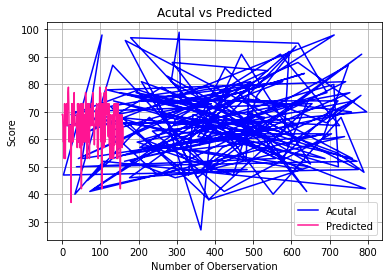

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('Score')
plt.legend()
plt.show()

# 5 Use Testset
Now going to use LinearRegression for four subject's score prediction

In [ ]:
df_test = pd.read_csv(r"/content/drive/MyDrive/ ML Engineer Hoobohoo/test.csv")
df_test.tail()

,id,gender,group,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Admission Fees,Education Level of Parents
195,995,female,group E,5,88,99,95,94,standard,master's degree
196,996,male,A3,4,62,55,55,60,free,ED
197,997,female,A3,5,59,71,65,69,free,ED
198,998,female,A4,5,68,78,77,87,standard,CD
199,999,female,A4,2,77,86,86,80,free,CD


In [ ]:
# Need to make same as "Df_mark"
#create dummy variables
gender_dummy = pd.get_dummies(df_test['gender'],drop_first = True)
group_dummy = pd.get_dummies(df_test['group'],drop_first = True)
parental_dummy = pd.get_dummies(df_test['Education Level of Parents'],drop_first = True)
admission_dummy = pd.get_dummies(df_test['Admission Fees'],drop_first = True)

In [ ]:
#concate along column wise 
df_test = pd.concat([df_test,gender_dummy,group_dummy,parental_dummy,admission_dummy],axis = 1)

In [ ]:
df_test = df_test.drop(['id','gender','group','Education Level of Parents','Admission Fees','CSE1203 Discrete Mathematics score'], axis=1)
df_test.head()

,preparation rating,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
0,5,73,68,58,1,0,1,0,0,0,1,0,0,1
1,5,80,73,74,1,0,1,0,0,0,1,0,0,1
2,2,94,95,87,0,0,0,0,1,0,0,1,0,1
3,3,85,87,97,0,1,0,0,0,1,0,0,0,1
4,4,76,78,68,0,0,1,0,0,1,0,0,0,1


In [ ]:
x_train.shape

(640, 14)

In [ ]:
df_test.shape

(200, 14)

In [ ]:
y_predict = regressor.predict(df_test)

In [ ]:
print(y_predict)

[ 73.568637    78.81992797  90.86996679  78.03686365  68.41949924
  77.36674616  62.2167124   35.95779335  75.9016403   57.48957995
  40.66097217  50.15374535  54.71770167  86.90798079  75.42007987
  90.08423253  55.11019923  72.40670515  59.43242277  81.79096819
  81.29686789  77.84907659  56.74570395  73.11017453  42.92526474
  67.98856406  56.34847892  67.13103379  69.37175458  61.21885737
  49.0050998   72.37122461  64.55529381  77.284145    55.40947675
  61.56744064  70.34717438  70.26714844  55.52153877  65.28311344
  39.46730936  60.5784158   28.3899887   76.71597089  52.13387412
  91.91640832  85.57987345  58.99124047  61.73404693  77.90152491
  71.75590783  58.447545    85.23585847  73.06822772  65.68383909
  88.08180501  67.9834702   72.11758735  52.68778524  74.83344067
  48.6600887   77.33515772  39.56963415  67.36098358  96.62052002
  88.897396    56.72132146  47.4555395   77.22561123  55.01524896
  56.68368794  65.12120381  83.67969632  89.95751646  49.8626231
  67.464499

In [ ]:
output1 = pd.DataFrame(y_predict,columns= ['CSE1203 Discrete Mathematics score'])
output1

,CSE1203 Discrete Mathematics score
0,73.568637
1,78.819928
2,90.869967
3,78.036864
4,68.419499
...,...
195,88.324780
196,56.448100
197,54.382872
198,67.740934


### Target ---> EEE2142 Electronic Devices and Circuits' score

In [ ]:
x_train=train.drop("EEE2142 Electronic Devices and Circuits' score",axis=1)
y_train=train["EEE2142 Electronic Devices and Circuits' score"]
x_test=test.drop("EEE2142 Electronic Devices and Circuits' score",axis=1)
y_test=test["EEE2142 Electronic Devices and Circuits' score"]

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

In [ ]:
df_test2 = pd.read_csv(r"/content/drive/MyDrive/ ML Engineer Hoobohoo/test.csv")

In [ ]:
# Need to make same as "Df_mark"
#create dummy variables
gender_dummy = pd.get_dummies(df_test2['gender'],drop_first = True)
group_dummy = pd.get_dummies(df_test2['group'],drop_first = True)
parental_dummy = pd.get_dummies(df_test2['Education Level of Parents'],drop_first = True)
admission_dummy = pd.get_dummies(df_test2['Admission Fees'],drop_first = True)

In [ ]:
#concate along column wise 
df_test2 = pd.concat([df_test2,gender_dummy,group_dummy,parental_dummy,admission_dummy],axis = 1)

In [ ]:
df_test2 = df_test2.drop(['id','gender','group','Education Level of Parents','Admission Fees',"EEE2142 Electronic Devices and Circuits' score"], axis=1)
df_test2.head()

,preparation rating,CSE1203 Discrete Mathematics score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
0,5,67,68,58,1,0,1,0,0,0,1,0,0,1
1,5,76,73,74,1,0,1,0,0,0,1,0,0,1
2,2,87,95,87,0,0,0,0,1,0,0,1,0,1
3,3,82,87,97,0,1,0,0,0,1,0,0,0,1
4,4,73,78,68,0,0,1,0,0,1,0,0,0,1


In [ ]:
y_predict = regressor.predict(df_test2)

In [ ]:
print(y_predict)

[ 68.65678194  74.3396327   94.67876607  87.29139362  77.44686522
  76.83567531  73.80151002  43.61169561  74.45098371  53.9543277
  41.70873634  52.25950471  65.16173966  78.67388316  83.98954951
  89.34080688  63.6316238   72.79265092  70.63608745  88.33625519
  92.65163052  90.70342483  52.0831272   83.76609969  54.40628669
  61.26622511  69.15972976  76.60635946  80.23792678  58.92671981
  62.34217898  87.02472523  61.76426904  88.30722633  49.99611912
  72.65185015  62.18460132  80.62778473  56.07869621  72.66521652
  48.18742327  56.08726535  37.30352316  76.86443852  61.35299677
  85.81039478  85.74067076  54.32173896  68.4187176   72.06372366
  69.64682568  66.7748952   92.1149525   66.66918091  59.29957412
  97.91257084  69.12543933  79.6999335   48.92467059  77.27067954
  54.67744073  88.34535915  38.47598109  78.3297665   93.22518378
  85.38016146  57.43893743  46.25637038  74.24654272  54.16299586
  51.45641837  74.98585651  79.1555003   85.14763725  60.50671993
  70.573548

In [ ]:
output2 = pd.DataFrame(y_predict,columns=["EEE2142 Electronic Devices and Circuits' score"])
output2

,EEE2142 Electronic Devices and Circuits' score
0,68.656782
1,74.339633
2,94.678766
3,87.291394
4,77.446865
...,...
195,93.683832
196,58.968151
197,66.512578
198,74.609296


### Target ---> CSE2200 Software Development I's score


In [ ]:
x_train=train.drop("CSE2200 Software Development I's score",axis=1)
y_train=train["CSE2200 Software Development I's score"]
x_test=test.drop("CSE2200 Software Development I's score",axis=1)
y_test=test["CSE2200 Software Development I's score"]

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

In [ ]:
df_test3 = pd.read_csv(r"/content/drive/MyDrive/ ML Engineer Hoobohoo/test.csv")

In [ ]:
# Need to make same as "Df_mark"
#create dummy variables
gender_dummy = pd.get_dummies(df_test3['gender'],drop_first = True)
group_dummy = pd.get_dummies(df_test3['group'],drop_first = True)
parental_dummy = pd.get_dummies(df_test3['Education Level of Parents'],drop_first = True)
admission_dummy = pd.get_dummies(df_test3['Admission Fees'],drop_first = True)

In [ ]:
#concate along column wise 
df_test3 = pd.concat([df_test3,gender_dummy,group_dummy,parental_dummy,admission_dummy],axis = 1)

In [ ]:
df_test3 = df_test3.drop(['id','gender','group','Education Level of Parents','Admission Fees',"CSE2200 Software Development I's score"], axis=1)
df_test3.head()

,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,MATH2203 Mathematics IV's score,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
0,5,67,73,58,1,0,1,0,0,0,1,0,0,1
1,5,76,80,74,1,0,1,0,0,0,1,0,0,1
2,2,87,94,87,0,0,0,0,1,0,0,1,0,1
3,3,82,85,97,0,1,0,0,0,1,0,0,0,1
4,4,73,76,68,0,0,1,0,0,1,0,0,0,1


In [ ]:
y_predict = regressor.predict(df_test3)

In [ ]:
print(y_predict)

[ 66.80440725  75.5457773   91.12646519  87.77404353  77.01393137
  73.82291004  77.61122427  42.85287905  75.99978584  52.62472336
  32.13912699  44.12245008  67.64131627  77.32698948  80.04344683
  86.25548525  57.09057458  67.32751148  67.45786895  84.60980548
  88.26224666  91.43781677  50.97146926  80.06587278  55.4233697
  58.84571521  69.38044036  67.66171354  86.473611    52.84713391
  60.25188337  89.27518222  55.92280577  84.15048002  46.90961516
  65.98907386  60.2612814   83.04413851  57.04414806  78.6577105
  47.89571694  54.61178726  38.76397606  72.3235304   62.31937507
  80.3991845   86.84363574  51.83409329  68.23879474  73.41271041
  66.77072509  66.10362601  89.09181456  66.46906531  57.60943801
  96.96888346  67.93417146  78.11939901  45.70460273  71.38920757
  62.30762073  88.23194991  40.18466182  74.86512335  90.56803811
  82.08391471  48.92017163  46.76754744  70.64853785  48.41028464
  54.7161438   75.33792994  80.27121164  83.5189135   59.91531217
  65.1690899

In [ ]:
output3 = pd.DataFrame(y_predict,columns=["CSE2200 Software Development I's score"])
output3

,CSE2200 Software Development I's score
0,66.804407
1,75.545777
2,91.126465
3,87.774044
4,77.013931
...,...
195,98.499019
196,55.258161
197,70.794174
198,81.529068


### Target ---> MATH2203 Mathematics IV's score

In [ ]:
x_train=train.drop("MATH2203 Mathematics IV's score",axis=1)
y_train=train["MATH2203 Mathematics IV's score"]
x_test=test.drop("MATH2203 Mathematics IV's score",axis=1)
y_test=test["MATH2203 Mathematics IV's score"]

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

In [ ]:
df_test4 = pd.read_csv(r"/content/drive/MyDrive/ ML Engineer Hoobohoo/test.csv")

In [ ]:
# Need to make same as "Df_mark"
#create dummy variables
gender_dummy = pd.get_dummies(df_test4['gender'],drop_first = True)
group_dummy = pd.get_dummies(df_test4['group'],drop_first = True)
parental_dummy = pd.get_dummies(df_test4['Education Level of Parents'],drop_first = True)
admission_dummy = pd.get_dummies(df_test4['Admission Fees'],drop_first = True)

In [ ]:
#concate along column wise 
df_test4 = pd.concat([df_test4,gender_dummy,group_dummy,parental_dummy,admission_dummy],axis = 1)

In [ ]:
df_test4 = df_test4.drop(['id','gender','group','Education Level of Parents','Admission Fees',"MATH2203 Mathematics IV's score"], axis=1)
df_test4.head()

,preparation rating,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,male,A2,A3,A4,group E,CD,ED,associate's degree,master's degree,standard
0,5,67,73,68,1,0,1,0,0,0,1,0,0,1
1,5,76,80,73,1,0,1,0,0,0,1,0,0,1
2,2,87,94,95,0,0,0,0,1,0,0,1,0,1
3,3,82,85,87,0,1,0,0,0,1,0,0,0,1
4,4,73,76,78,0,0,1,0,0,1,0,0,0,1


In [ ]:
y_predict = regressor.predict(df_test4)

In [ ]:
print(y_predict)

[67.70048847 72.40347031 91.84965696 85.10689863 77.33819272 74.11874945
 73.24242679 37.89163267 68.41093588 51.88408783 36.84820579 49.1044972
 65.39502493 73.4961909  82.17409942 84.39456212 65.61385755 75.13656487
 65.7728557  86.91387333 89.90522344 90.93271489 49.92967403 79.2412665
 51.06734647 58.91744153 68.32621922 75.18869302 78.09045094 52.57965086
 57.4039838  87.36878308 60.22710921 85.81375705 46.19848715 72.49725763
 55.79240721 77.56012536 51.59376026 72.14205329 45.3846204  51.91354758
 34.9322528  74.31076256 62.1310737  81.07508799 82.96123928 50.19950438
 67.41606701 68.87799895 66.84656128 63.09028261 89.94768825 59.22907603
 56.16360006 94.44926112 63.91031037 81.58724012 45.44392762 71.12360322
 53.19875359 82.54892652 38.70119834 78.97072048 90.34136246 86.84122726
 52.27667735 40.60977889 69.08045154 51.78415628 46.63964848 75.20726098
 76.31852294 79.12000652 61.66484748 65.80926723 83.83986983 54.48427817
 78.82971049 72.48453468 66.79633704 68.09835562 68.7

In [ ]:
output4 = pd.DataFrame(y_predict,columns=["MATH2203 Mathematics IV's score"])
output4

,MATH2203 Mathematics IV's score
0,67.700488
1,72.403470
2,91.849657
3,85.106899
4,77.338193
...,...
195,90.556025
196,54.318522
197,63.326043
198,75.747839


In [ ]:
#concatenate 4 output together
result = pd.concat([output1, output2, output3, output4], axis=1)
result

,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score
0,73.568637,68.656782,66.804407,67.700488
1,78.819928,74.339633,75.545777,72.403470
2,90.869967,94.678766,91.126465,91.849657
3,78.036864,87.291394,87.774044,85.106899
4,68.419499,77.446865,77.013931,77.338193
...,...,...,...,...
195,88.324780,93.683832,98.499019,90.556025
196,56.448100,58.968151,55.258161,54.318522
197,54.382872,66.512578,70.794174,63.326043
198,67.740934,74.609296,81.529068,75.747839


In [ ]:
#Add Mean score column
result['Mean score'] = result.mean(axis=1)
result

,CSE1203 Discrete Mathematics score,EEE2142 Electronic Devices and Circuits' score,CSE2200 Software Development I's score,MATH2203 Mathematics IV's score,Mean score
0,73.568637,68.656782,66.804407,67.700488,69.182579
1,78.819928,74.339633,75.545777,72.403470,75.277202
2,90.869967,94.678766,91.126465,91.849657,92.131214
3,78.036864,87.291394,87.774044,85.106899,84.552300
4,68.419499,77.446865,77.013931,77.338193,75.054622
...,...,...,...,...,...
195,88.324780,93.683832,98.499019,90.556025,92.765914
196,56.448100,58.968151,55.258161,54.318522,56.248234
197,54.382872,66.512578,70.794174,63.326043,63.753917
198,67.740934,74.609296,81.529068,75.747839,74.906784


# 6.Upload the predicted marks for the test data in CSV file

In [ ]:
result.to_csv("/content/drive/MyDrive/ ML Engineer Hoobohoo/prediction.csv")